In [42]:
import sys
import os
import importlib
import numpy as np
from itertools import product, permutations
from IPython.core.display import display, HTML

# widen printing output
np.set_printoptions(linewidth=1000)

# Custom CSS to reduce vertical space between code cells
display(HTML("""
<style>
    .cell { margin-top: 0 !important; margin-bottom: 0 !important; }
    .cell .input, .cell .output { margin-top: 0 !important; margin-bottom: 0 !important; }
</style>
"""))

project_root = os.path.abspath('..')  # or the absolute path to your project
if project_root not in sys.path:
    sys.path.append(project_root)

import game_utils
importlib.reload(game_utils)

from game_utils import kuhn, utils, LP, Strategy, CFR, ZeroSumGame, progressiveKuhn
importlib.reload(CFR)
importlib.reload(kuhn)
importlib.reload(progressiveKuhn)
importlib.reload(utils)
importlib.reload(LP)
importlib.reload(Strategy)
importlib.reload(ZeroSumGame)

MixedStrategy = Strategy.MixedStrategy
PureStrategy = Strategy.PureStrategy

print("Modules reloaded successfully!")

/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_95418/3157739927.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Modules reloaded successfully!


In [27]:
# Linear programming solve
def LP_Solve(game):
    payoffs = game.convert_to_normal()

    freqs1, value1 = LP.solve_normal_zero_sum(payoffs)
    freqs2, value2 = LP.solve_normal_zero_sum(payoffs, player=1)

    print("Value of the game: ", value1)

    nash_strat1 = MixedStrategy.from_normal_form(freqs1, 0, game)
    nash_strat2 = MixedStrategy.from_normal_form(freqs2, 1, game)

    utils.binaryStrategyHeatmap(nash_strat1 | nash_strat2, transpose=True, figsize=(14, 2), title="LP Nash EQ")
    return nash_strat1, nash_strat2

def CFR_solve(game, iters=10000, figsize=(14, 2)):
    solver = CFR.CFRSolver(game)
    solver.train(iters)
    strategy = solver.get_strategy(0) | solver.get_strategy(1)

    utils.binaryStrategyHeatmap(strategy, transpose=True, figsize=figsize, title="CFR Nash EQ")
    return solver.get_strategy(0), solver.get_strategy(1)

Value of the game:  -0.05555555555555556


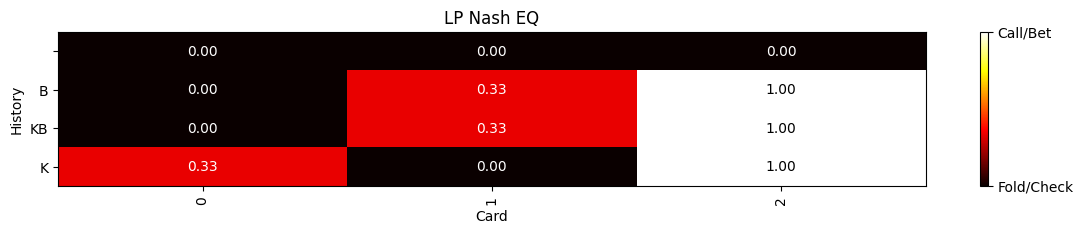

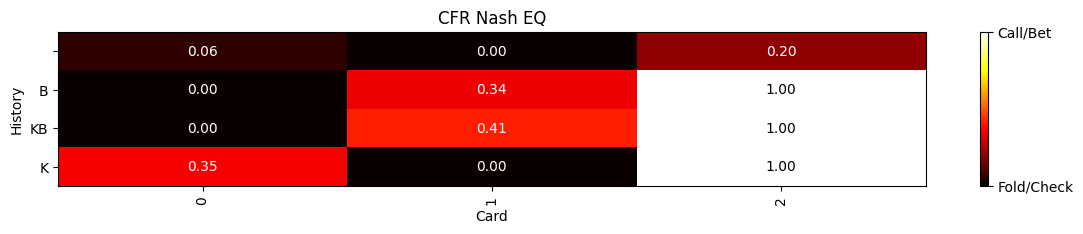

In [26]:
LP_nash1, LP_nash2 = LP_Solve(kuhn.ThreeCard)
CFR_nash1, CFR_nash2 = CFR_solve(kuhn.ThreeCard, iters=20000)

Value of the game:  0.05555555555555554


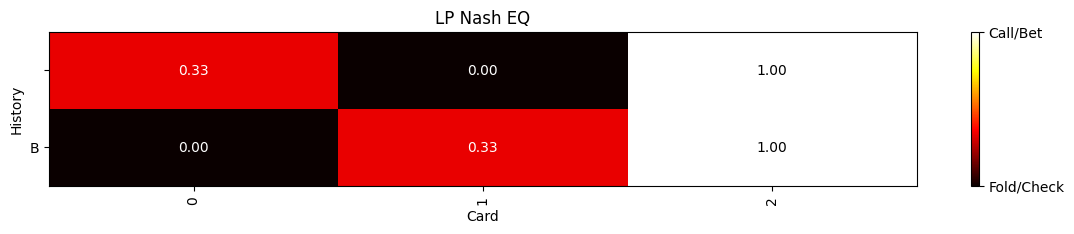

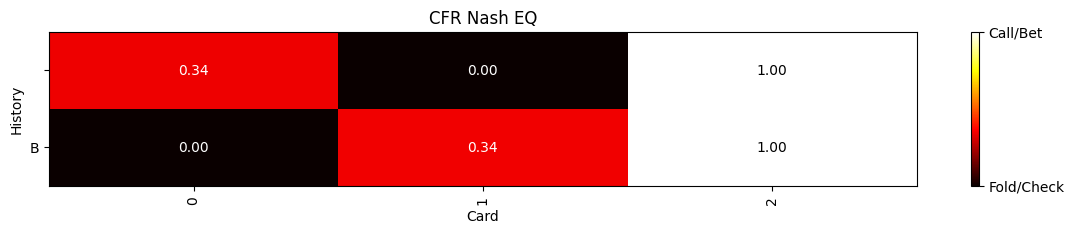

({InfoSet with type: 0, history: : array([0.65721616, 0.34278384]),
  InfoSet with type: 1, history: : array([9.99408109e-01, 5.91891092e-04]),
  InfoSet with type: 2, history: : array([2.97088532e-04, 9.99702911e-01])},
 {InfoSet with type: 0, history: B: array([1., 0.]),
  InfoSet with type: 1, history: B: array([0.65576367, 0.34423633]),
  InfoSet with type: 2, history: B: array([0., 1.])})

In [ ]:
LP_Solve(kuhn.ThreeCardHalfStreet)
CFR_solve(kuhn.ThreeCardHalfStreet)

In [28]:
print(kuhn.ThreeCard.expected_payoff_approx(LP_nash1, LP_nash2))
print(kuhn.ThreeCard.expected_payoff_approx(CFR_nash1, CFR_nash2))
print(kuhn.ThreeCard.expected_payoff_approx(LP_nash1, CFR_nash2))
print(kuhn.ThreeCard.expected_payoff_approx(CFR_nash1, LP_nash2))
# all fairly close to the value of the game, so these could reasonably be considered nash equilibria

# https://en.wikipedia.org/wiki/Kuhn_poker
# both are differently parametrized versions of the analytical NEQ

-0.029
-0.046
-0.033
-0.078


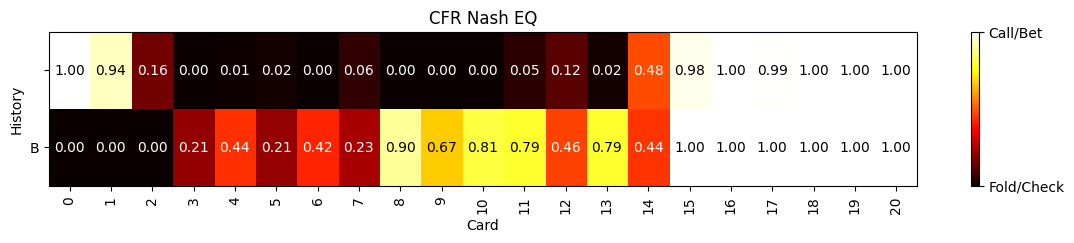

In [ ]:
# LP_nash1, LP_nash2 = LP_Solve(kuhn.KuhnNoCheck.nCard(8))
CFR_nash1, CFR_nash2 = CFR_solve(kuhn.HalfStreetKuhn.nCard(21), iters=10000)

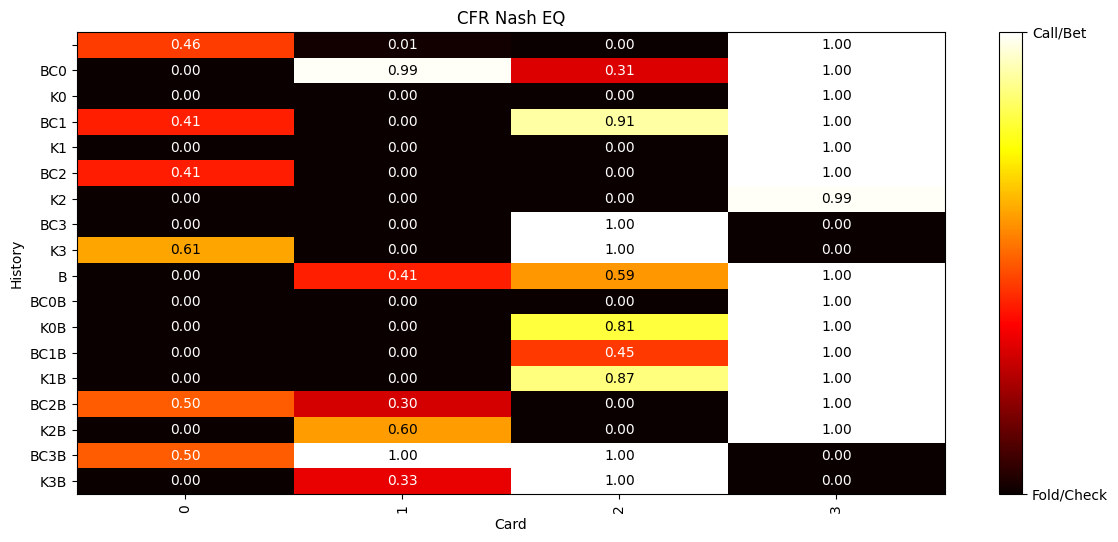

({InfoSet with type: 0, history: : array([0.54320886, 0.45679114]),
  InfoSet with type: 0, history: K1: array([9.99545439e-01, 4.54560832e-04]),
  InfoSet with type: 0, history: K2: array([9.99777900e-01, 2.22100426e-04]),
  InfoSet with type: 0, history: K3: array([0.38707993, 0.61292007]),
  InfoSet with type: 0, history: BC1: array([0.58644935, 0.41355065]),
  InfoSet with type: 0, history: BC2: array([0.59076968, 0.40923032]),
  InfoSet with type: 0, history: BC3: array([9.9948393e-01, 5.1606972e-04]),
  InfoSet with type: 1, history: : array([0.98508122, 0.01491878]),
  InfoSet with type: 1, history: K0: array([9.99496627e-01, 5.03373498e-04]),
  InfoSet with type: 1, history: K2: array([9.99860351e-01, 1.39648597e-04]),
  InfoSet with type: 1, history: K3: array([9.99913624e-01, 8.63761298e-05]),
  InfoSet with type: 1, history: BC0: array([0.00941817, 0.99058183]),
  InfoSet with type: 1, history: BC2: array([0.9979716, 0.0020284]),
  InfoSet with type: 1, history: BC3: array([

In [49]:
CFR_solve(progressiveKuhn.ProgressiveKuhn.nCard(4), figsize=(14, 6), iters=500000)


In [37]:
s = progressiveKuhn.ProgressiveKuhn.nCard(3).random()
print(s)
s = s.get_next_state('B')
s = s.get_next_state('C')
print(s.get_payoff(0))
print(s.get_payoff(1))
# s.get_actions()


ProgressiveKuhn(3), P1 type: 1, P2 type: 0, Nature type: 2, History: 
2
-2


In [24]:
kuhn.HalfStreetKuhn.nCard(3).random().get_next_state('B').get_next_state('F').get_payoff(0)

1

In [63]:
a = (90+53) * 2 * np.pi/ 360
r = 10
print(r * np.sin(a))
print(r * np.cos(a))

6.018150231520481
-7.986355100472929
